# Topics' Modelling

In [3]:
# !pip install corus

In [16]:
from corus import load_lenta

path = 'lenta-ru-news.csv.gz'
records = load_lenta(path)

In [18]:
data = [(record.title, record.topic, record.text, record.tags) for record in records]

In [19]:
import pandas as pd
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

C:\Users\fross\AppData\Local\Temp/ipykernel_21580/331133830.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


In [20]:
data = pd.DataFrame(data, columns=['title','topic','text','tags'])

In [21]:
data.sample(3)

,title,topic,text,tags
665423,Члены хунты Пиночета сознались в уничтожении тел расстрелянных,Мир,"Восемь чилийских отставных генералов, включая членов хунты Аугусто Пиночета, правившей страной с 1973 по 1990 годы, рассказали о раскопках секретных захоронений, где были погребены многие жертвы режима, тела которых извлекались из-под земли для скрытия улик, сообщает сайт BBC News. Извинившиеся перед чилийским народом генералы рассказали, что речь идет о людях, убитых в президентском дворце в 1973 году. Их тела были эксгумированы в декабре 1978 и сброшены в море с вертолетов. Всего за время, пока страной правил Пиночет, были убиты более 3000 человек. Сотни тел погибших не найдены до сих пор. На минувшей неделе чилийский суд начал рассмотрение дела пяти бывших военных, причастных к незаконной эксгумации. Генералы, публично заявившие о преступлении, в список обвиняемых не попали. По словам бывшего министра внутренних дел Чили Кесаря Бенавидиса (Cesar Benavides) и министра обороны Германа Брэди (Herman Brady) они не отдавали таких приказов. Генералы, кроме того, выразили согласие с тем, что виновные должны быть наказаны. ""Какими бы не были обстоятельства, в которых выкапывались трупы, эти действия - явное нарушение правил поведения офицера"", - сказали они. ""Мы оплакиваем ту боль, которые принесли людям эти события. Независимо от понимания того, как возникло военное правительство, и как оно работало, мы признаем, что проблема соблюдения прав человека существовала, и это никогда не должно повториться"", - добавили генералы.",Все
181728,Представлен новый дизайн статуэток премии MTV VMA,Ценности,"Победители премии MTV Video Music Awards в этом году будут получать обновленную статуэтку Moonman. Разработкой дизайна занимался модельер Джереми Скотт, сообщает Variety. Статуэтка астронавта, держащего в руках флаг MTV, украшена международным символом мира — «пацификом» — и дополнена кроссовками с крылышками из линейки Скотта, разработанной для Adidas. В этом году церемония вручения наград, которая станет 32-й по счету, пройдет 30 августа в Лос-Анджелесе на сцене театра Microsoft Theater. Ведущей станет американская актриса и певица Майли Сайрус. В номинации «Видео года» представлены клипы Бейонсе, хип-хоп исполнителя Кедрика Ламара, британского диджея Марка Ронсона, певца Эдварда Ширана и Тейлор Свифт. На прошлогодней церемонии награду в категории «Лучшее женское видео» получила Кэти Перри за клип Dark Horse, «лучшим мужским видео» признали клип рокера Эда Ширана на песню Sing. Награду за лучшее рок-видео получила певица Lord (за композицию Royals). Обладательницей главного приза — в номинации «Видео года» — стала Майли Сайрус, она получила награду за клип к песне Wrecking Ball. MTV Video Music Awards — ежегодная церемония вручения наград за создание видеоклипов, была учреждена в 1984 году.",Явления
616054,Внешторгбанк выпустит облигации с высшим кредитным рейтингом,Экономика,"В 2005 году на рынке могут появиться российские еврооблигации с высшим кредитным рейтингом - ААА, пишут ""Ведомости"". Достичь рейтинга ААА попробует Внешторгбанк, застраховавшись от дефолта у основных мировых страховщиков. На данный момент внешний долг Внешторгбанка составляет 4 миллиарда долларов, и он стремится привлечь еще больше средств, в частности, при помощи новых финансовых инструментов. В начале 2005 года Внешторгбанк уже размещал учитываемые при расчете капитала еврооблигации на 750 миллионов долларов. В июне-июле банк собирается разместить на Западе 30-летние бумаги. Ранее выпуск 30-летних бумаг такого объема практиковал лишь ""Газпром"", разместивший долгосрочных еврооблигаций на 1,2 миллиарда долларов. Источники, близкие к банку, сообщают, что Внешторгбанку необходимы долгосрочные ресурсы для эффективного участия в проектах с большим сроком окупаемости. Кроме того, на рынке вырос спрос на длинные бумаги, и это позволит банку взять в долг с большей выгодой. Внешторгбанк разместит также самые дешевые в российской истории бумаги - обеспеченные евробонды. Вн

In [22]:
len(data)

739351

In [23]:
data.topic.value_counts().head(15)

Россия               160519
Мир                  136680
Экономика            79538 
Спорт                64421 
Культура             53803 
Бывший СССР          53402 
Наука и техника      53136 
Интернет и СМИ       44675 
Из жизни             27611 
Дом                  21734 
Силовые структуры    19596 
Ценности             7766  
Бизнес               7399  
Путешествия          6408  
69-я параллель       1268  
Name: topic, dtype: int64

### let's leave just 5 topics

In [24]:
topics = ['Экономика', 'Спорт', 'Культура', 'Путешествия', 
          'Наука и техника']

data = data[data.topic.isin(topics)]
data.dropna(inplace=True)
len(data)

257306

## preprocessing

In [25]:
import re
import numpy as np
from nltk.corpus import stopwords
from tqdm.notebook import tqdm
from multiprocessing import Pool
from pymystem3 import Mystem

In [28]:
# import nltk
# nltk.download('stopwords')

In [29]:
# !pip install pymorphy2

In [30]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [31]:
words_regex = re.compile('\w+')

def find_words(text, regex = words_regex):
    tokens =  regex.findall(text.lower())
    return [w for w in tokens if w.isalpha() and len(w) >= 3]


stopwords_list = stopwords.words('russian')

# mystem = Mystem()
# def lemmatize(words, lemmer = mystem, stopwords = stopwords_list):
#     lemmas = lemmer.lemmatize(' '.join(words))
#     return [w for w in lemmas if not w in stopwords 
#             and w.isalpha()]

def lemmatize(words, lemmer = morph, stopwords = stopwords_list):
    lemmas = [lemmer.parse(w)[0].normal_form for w in words]
    return [w for w in lemmas if not w in stopwords 
            and w.isalpha()]

def preprocess(text):
    return (lemmatize(find_words(text)))

In [32]:
data.text.iloc[1]

'Сотрудники социальной сети Instagram проанализировали поставленные пользователями смайлики, геолокации и хештеги и опубликовали итоги 2018 года. Об этом сообщается на официальном сайте Instagram. Таким образом, самой счастливой геолокацией Instagram признал Диснейленд в Токио, так как больше всего счастливых смайликов в 2018 году пользователи ставили именно под фотографиями из японского Диснейленда. Также эксперты назвали самый популярный фильтр для лица: им стал фильтр с сердечками на глазах. А, например, самыми часто используемыми хештегами в 2018 году были #metoo, #timesup и #marchforourlives. В ноябре сотрудники британской ассоциации потребителей Which? составили рейтинг самых безопасных стран для путешествий. Специалисты проанализировали 20 самых популярных туристических направлений по четырем критериям: уровень преступности, угроза здоровью, вероятность теракта и стихийных бедствий. Самой безопасной страной по всем параметрам стала Исландия.'

In [33]:
print(preprocess(data.text.iloc[1]))

['сотрудник', 'социальный', 'сеть', 'instagram', 'проанализировать', 'поставить', 'пользователь', 'смайлик', 'геолокация', 'хештег', 'опубликовать', 'итог', 'год', 'это', 'сообщаться', 'официальный', 'сайт', 'instagram', 'образ', 'счастливый', 'геолокация', 'instagram', 'признать', 'диснейленд', 'токио', 'большой', 'весь', 'счастливый', 'смайлик', 'год', 'пользователь', 'ставить', 'именно', 'фотография', 'японский', 'диснейленд', 'также', 'эксперт', 'назвать', 'самый', 'популярный', 'фильтр', 'лицо', 'стать', 'фильтр', 'сердечко', 'глаз', 'например', 'самый', 'часто', 'использовать', 'хештег', 'год', 'metoo', 'timesup', 'marchforourlives', 'ноябрь', 'сотрудник', 'британский', 'ассоциация', 'потребитель', 'which', 'составить', 'рейтинг', 'самый', 'безопасный', 'страна', 'путешествие', 'специалист', 'проанализировать', 'самый', 'популярный', 'туристический', 'направление', 'четыре', 'критерий', 'уровень', 'преступность', 'угроза', 'здоровье', 'вероятность', 'теракт', 'стихийный', 'бедств

In [35]:
data = data.sample(10000)
data.topic.value_counts()

Экономика          2995
Спорт              2484
Наука и техника    2157
Культура           2106
Путешествия        258 
Name: topic, dtype: int64

In [42]:
preprocessed_text = list(tqdm(map(preprocess, data['text']), total=len(data)))

  0%|          | 0/10000 [00:00<?, ?it/s]

In [43]:
data['text'] = preprocessed_text
data.sample(3)

,title,topic,text,tags
460645,АСВ нашло инвестора для сибирского отделения банка ВЕФК,Экономика,"[агентство, страхование, вклад, асв, заниматься, спасение, пострадать, кризис, банк, найти, инвестор, оздоровление, банк, вефк, сибирь, это, писать, газета, ведомость, ожидаться, спасение, финансовый, организация, заняться, номос, банк, принимать, участие, санация, вефк, санкт, петербург, корпорация, вефк, принадлежать, александр, гительсон, приобрести, вефк, сибирь, год, покупка, процент, акция, финансовый, организация, носить, прежде, название, новосибирсквнешторгбанк, принадлежать, втб, обойтись, миллион, доллар, вефк, стать, первый, банк, спасение, который, стать, заниматься, асв, осень, год, получить, соответствующий, полномочие, предварительный, оценка, санация, вефк, сибирь, потребоваться, инвестировать, миллион, рубль, номос, банк, рассчитывать, обойтись, малый, сумма, рассчитывать, также, получить, кредит, асв, кроме, финансовый, организация, предстоять, инвестировать, часть, средство, спасение, вефк, санкт, петербург, ...]",Все
401647,Виновник поражения Бразилии обвинил в пропущенном голе вувузелы,Спорт,"[полузащитник, сборная, бразилия, футбол, фелипа, мести, заявить, причина, автогол, матч, финал, чемпионат, мир, голландия, стать, звук, вувузел, южноафриканский, дудка, который, использовать, болельщик, стадион, это, сообщать, интернет, издание, goal, com, матч, голландия, бразилец, выйти, вперёд, минута, благодаря, гол, робиньо, причём, голевой, пас, партнёр, отдать, именно, мести, второй, тайм, голландец, забить, мяч, выйти, полуфинал, гол, забитый, вести, снейдёр, первоначально, учесть, протокол, автогол, мести, защитник, голова, срезать, мяч, свой, ворота, подача, штрафной, минута, матч, голландия, мести, удалённый, поле, грубый, игра, мести, заявить, хотеть, козёл, отпущение, футболист, признать, нести, часть, ответственность, поражение, голландия, это, мести, подчеркнуть, сделать, всё, сила, слово, игрок, эпизод, автоголый, вратарь, ...]",Все
221128,Большинство населения Земли всегда составляли женщины,Наука и техника,"[земля, женщина, большой, мужчина, утверждать, учёный, институт, эволюционный, антропология, имя, макс, планк, исследование, представить, страница, журнал, investigative, genetics, выяснение, демографический, история, человечество, использовать, новый, методика, извлечение, генетический, информация, учёный, сравнить, наследовать, отцовский, линия, хромосома, nry, материнский, митохондриальный, днк, мтднк, мужчина, представитель, народ, оказаться, ещё, миграция, предок, человек, африка, женщина, род, homo, большой, мужчина, закономерность, сохраняться, протяжение, весь, история, возможно, причина, это, являться, полигиния, мужчина, вступать, половой, отношение, многий, женщина, вирилокальность, заключение, брак, жена, переезжать, муж, итог, слабый, пол, подарить, население, планета, большой, ген, сильный, ранний, генетика, анализировать, nry, мтднк, разный, метод, затруднять, сравнение, немецкий, учёный, разработать, новый, способ, секвенирование, хромосома, ...]",Наука


## LDA

In [47]:
# !pip install -U gensim

In [48]:
from gensim.models import *
from gensim import corpora

#### dictionary creation

In [49]:
dictionary = corpora.Dictionary(data['text'])

dictionary.filter_extremes(no_below = 10, no_above = 0.9, keep_n=None) # игнорируем слова, которые встречаются реже 10 раз или составляют более 0.9 словаря 
dictionary.save('lenta.dict')

#### vectorization of documents

In [50]:
corpus = [dictionary.doc2bow(text) for text in data['text']]
corpora.MmCorpus.serialize('lenta.model', corpus) 

In [76]:
%time
lda = ldamodel.LdaModel(corpus, id2word=dictionary, 
                        num_topics=5, 
                        chunksize=50, 
                        update_every=1, 
                        passes=10)

Wall time: 0 ns


#### let's display topics

In [78]:
lda.show_topics(num_topics=10, num_words=10, formatted=True)

[(0,
  '0.020*"компания" + 0.020*"год" + 0.013*"россия" + 0.010*"российский" + 0.010*"это" + 0.009*"который" + 0.007*"страна" + 0.006*"заявить" + 0.006*"акция" + 0.006*"также"'),
 (1,
  '0.016*"матч" + 0.013*"команда" + 0.012*"сборная" + 0.011*"чемпионат" + 0.010*"клуб" + 0.010*"это" + 0.008*"который" + 0.008*"год" + 0.008*"счёт" + 0.008*"мир"'),
 (2,
  '0.030*"процент" + 0.026*"год" + 0.021*"доллар" + 0.013*"банк" + 0.013*"рубль" + 0.013*"это" + 0.012*"миллиард" + 0.009*"россия" + 0.008*"цена" + 0.007*"миллион"'),
 (3,
  '0.014*"который" + 0.011*"это" + 0.010*"год" + 0.007*"новый" + 0.006*"время" + 0.005*"мочь" + 0.005*"учёный" + 0.005*"система" + 0.005*"также" + 0.004*"работа"'),
 (4,
  '0.026*"год" + 0.013*"фильм" + 0.011*"который" + 0.009*"the" + 0.008*"это" + 0.007*"стать" + 0.007*"свой" + 0.006*"сообщать" + 0.006*"режиссёр" + 0.006*"картина"')]

### visualization with pyLDAvis

In [79]:
# !pip install pyLDAvis

In [80]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
# from pyLDAvis import gensim as gensimvis

In [81]:
%time
vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)

Wall time: 0 ns


In [82]:
topics

['Экономика', 'Спорт', 'Культура', 'Путешествия', 'Наука и техника']

### metrics

In [87]:
print(lda.log_perplexity(corpus))

-7.6979851690916234


In [88]:
print('Персплексия: ', np.exp(lda.log_perplexity(corpus)))

Персплексия:  0.0004537399867496093


In [89]:
coherence_model_lda = CoherenceModel(model=lda, texts=data['text'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Средняя когерентность: ', coherence_lda)

Средняя когерентность:  0.44090007745396304


## now we can adjust the number of topics by looking at metrics!!!

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline

  0%|          | 0/5 [00:00<?, ?it/s]

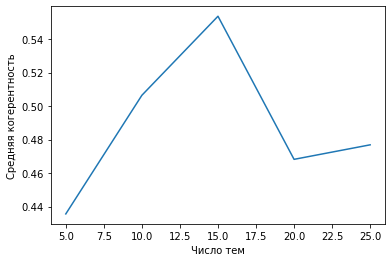

In [91]:
topics_list = [5, 10, 15, 20, 25]
coherences = []

for num in tqdm(topics_list):
    lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=num, chunksize=50, update_every=1, passes=2)
    coherences.append(CoherenceModel(model=lda, texts=data['text'], dictionary=dictionary, coherence='c_v').get_coherence())

plt.plot(topics_list, coherences)
plt.xlabel("Число тем")
plt.ylabel("Средняя когерентность")
plt.show()

In [93]:
lda_15 = ldamodel.LdaModel(corpus, id2word=dictionary, 
                           num_topics=15, 
                           chunksize=50, 
                           update_every=1, 
                           passes=10)
vis_data = gensimvis.prepare(lda_15, corpus, dictionary)
pyLDAvis.display(vis_data)